In [62]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = "MS Gothic"    # フォントは日本語対応の

In [63]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
path = r"C:\Users\e13993\Desktop\データ分析\02_データ理解\DATA\Data_01追記.xlsx"
df = pd.read_excel(path)
df.head()

,Index,ヘッド番号,チップID,ウエハID,検査ID,検査日時,検査装置No,合否判定,LA_6_チップ容量最小値,LA_6_チップ容量最大値,...,3_ウエハ容量平均値,3_ウエハ容量1~10ch平均値,3_ウエハ容量247~256ch平均値,3_ウエハ容量中央値,3_ウエハ容量チャンネル001,3_ウエハ容量チャンネル128,3_ウエハ容量チャンネル256,3_ウエハ容量標準偏差,3_ウエハ容量分散,合否フラグ
0,0,XA1002113,X1002113,X10021,1812285,43502.395046,20,合格,880.950012,896.142029,...,10810.480664,10903.28,10687.655,10797.35,10929.8,10792.75,10715.0,75.390536,5683.732878,1
1,1,XA1002104,X1002104,X10021,1812344,43502.408831,20,合格,873.458984,895.859009,...,10810.480664,10903.28,10687.655,10797.35,10929.8,10792.75,10715.0,75.390536,5683.732878,1
2,2,XA1002111,X1002111,X10021,1812389,43502.422650,20,合格,870.364990,880.263000,...,10810.480664,10903.28,10687.655,10797.35,10929.8,10792.75,10715.0,75.390536,5683.732878,1
3,3,XA1002114,X1002114,X10021,1812494,43502.452106,20,合格,882.367004,896.418030,...,10810.480664,10903.28,10687.655,10797.35,10929.8,10792.75,10715.0,75.390536,5683.732878,1
4,4,XA1002108,X1002108,X10021,1812684,43502.511748,20,合格,870.942993,885.932983,...,10810.480664,10903.28,10687.655,10797.35,10929.8,10792.75,10715.0,75.390536,5683.732878,1


In [64]:
y = df['合否フラグ']
X = df.loc[:, df.columns.str.startswith('6_')]

In [65]:
x = df[['RB_6_チップ容量最小値','RB_6_チップ容量最大値','RA_6_チップ容量最小値','RA_6_チップ容量最大値','LA_6_チップ容量最小値','LA_6_チップ容量最大値','LB_6_チップ容量最小値','LB_6_チップ容量最大値','3_ウエハ容量標準偏差']]
y = df['合否フラグ']

In [66]:
x = pd.get_dummies(x, drop_first=True)

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df_x,df_y,random_state=1)

model.fit(train_x, train_y)

from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=3, random_state=1)

model.predict(X_test)

model.score(X_test,y_test)

from sklearn.tree import plot_tree
plot_tree(model, feature_names=X_train.columns,class_names=True, filled=True)

In [68]:
from sklearn.model_selection import train_test_split

# データを学習データとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=2020)
# 結果の確認
print('学習用データのデータ割合', y_train.shape[0] / y.shape[0])
print('テストデータのデータ数', y_test.shape[0] / y.shape[0])

学習用データのデータ割合 0.7998434237995825
テストデータのデータ数 0.20015657620041755


In [70]:
# 学習データをさらに学習データと検証データに分割する
X_train2, X_valid, y_train2, y_valid = train_test_split(X_train,
                                                        y_train,
                                                        test_size=0.2,
                                                        random_state=2020)
# 結果の確認
print('学習用データのデータ割合', y_train2.shape[0] / y_train.shape[0])
print('検証用データのデータ割合', y_valid.shape[0] / y_train.shape[0])

学習用データのデータ割合 0.8
検証用データのデータ割合 0.2


In [71]:
import lightgbm as lgb

# 学習用データと検証用データをDataset形式に変換
lgb_train = lgb.Dataset(X_train2, label=y_train2)
lgb_valid = lgb.Dataset(X_valid, label=y_valid)


In [72]:
# 学習パラメータの設定
params_lgb = {
        'boosting': 'gbdt',       # 学習アルゴリズムの指定(勾配ブースティング)
        'objective': 'binary',    # 目的関数(今回は2値分類)
        'metric': 'auc',          # モデルをどの指標に対して最適化するか(今回はAUC)
        'learning_rate': 0.01,    # 学習率
        'max_depth': 3,           # 木の深さ
        'num_leaves': 8,          # 葉の数
        'feature_fraction': 0.7,  # 1つの木の学習に使用する特徴量の比率
        'bagging_fraction': 0.7,  # 1つの木の学習に使用するデータの比率
        'num_threads': 4,         # 学習時に使用するCPU数
        'seed': 2020,             # 乱数シード値
        'verbose': -1,            # 学習時の警告などのログの出力設定(-1で出力しない)
        }


In [73]:
# モデルの訓練
model = lgb.train(
    params=params_lgb,          # 学習パラメータを設定
    train_set=lgb_train,        # 学習用データセットの設定
    valid_sets=lgb_valid,       # 検証用データセットの設定
    num_boost_round=1000,       # 学習する木の最大数(最大ラウンド数)
    early_stopping_rounds=100,  # 何ラウンド精度が改善しなかったら学習を止めるか
    verbose_eval=100,           # 精度指標を出力するラウンド数
    )


Training until validation scores don't improve for 100 rounds
[100]	valid_0's auc: 0.5
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


In [74]:
# テストデータに対して予測値を算出する
pred_proba_test = model.predict(X_test, num_iteration=model.best_iteration)

# 結果の確認
pred_proba_test[0:5]

array([0.73613377, 0.73613377, 0.73613377, 0.73613377, 0.73613377])

In [75]:
import numpy as np

# 閾値の設定
threshold = 0.5

# 0.5以上なら1、そうでなければ0に変換
pred_label_test = np.where(pred_proba_test >= threshold, 1, 0)

# 結果の確認
print('予測が「不合格」のデータ数: ', pred_label_test[pred_label_test == 1].shape[0])
print('予測が「合格」のデータ数: ', pred_label_test[pred_label_test == 0].shape[0])


予測が「不合格」のデータ数:  767
予測が「合格」のデータ数:  0


In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 指標の計算
accuracy = accuracy_score(y_test, pred_label_test)
precision = precision_score(y_test, pred_label_test)
recall = recall_score(y_test, pred_label_test)
f1 = f1_score(y_test, pred_label_test)

# 指標の出力
print('Test Accuracy: ', accuracy.round(2))
print('Test Precision: ', precision.round(2))
print('Test Recall: ', recall.round(2))
print('Test F1-score: ', f1.round(2))

Test Accuracy:  0.73
Test Precision:  0.73
Test Recall:  1.0
Test F1-score:  0.85


In [77]:
from sklearn.metrics import confusion_matrix

#混同行列を計算する
cm_test = confusion_matrix(y_test, pred_label_test)

# データフレームに変換する
df_cm = pd.DataFrame(
    cm_test, 
    columns = np.unique(y_test), # カラム名を0, 1とする
    index = np.unique(y_test), # インデックス番号を0, 1とする
    )

In [78]:
# インデックス名を設定
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Prediction'

# 行・列どちらも0, 1の順になっているため、1, 0の順になるように並び替える
df_cm = df_cm.sort_index(axis='index', ascending=False)
df_cm = df_cm.sort_index(axis='columns', ascending=False)

# 結果の確認
print(df_cm)

Prediction    1  0
Actual            
1           562  0
0           205  0


In [79]:
from sklearn.metrics import auc, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 指標の計算

# ROC曲線の各点の値(閾値ごとのFPRとTPR)の計算
false_positive_rates, true_positive_rates, thresholds = roc_curve(y_test, pred_proba_test) 

# aucの計算
test_auc = auc(false_positive_rates, true_positive_rates)

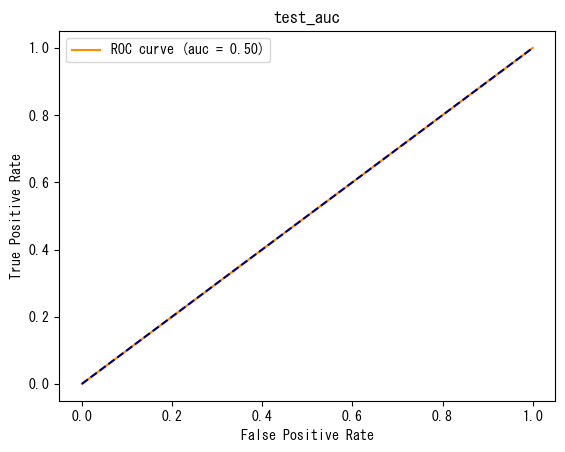

In [80]:
# 描画の作成

# 描画オブジェクトの作成
fig, ax = plt.subplots(1, 1)

# ROC曲線の描画
sns.lineplot(x = false_positive_rates, 
             y = true_positive_rates, 
             color = 'darkorange', label = f'ROC curve (auc = {test_auc:.2f})', ax = ax)

# 座標(0, 0) ~ (1, 1)の直線の描画
sns.lineplot(x = [0, 1], 
             y = [0, 1], 
             color='navy', linestyle='--', ax = ax);

# 軸ラベルとタイトルの設定
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('test_auc');

In [81]:
# 金額のパラメータを設定
TRUE_POSITIVE_BENEFIT = 35876 #不合格品を正しく判定できた場合に削減できるコスト
FALSE_POSITIVE_COST = 9112 #合格品を誤って判定した場合に発生するコスト

# 混同行列を一次元に変換して、各要素を変数に格納
# tpは「不合格と判定された不合格サンプル」(true positiveの略)
# fpは「不合格と判定された合格サンプル」(false positiveの略)
cm = confusion_matrix(y_test, pred_label_test)
tn, fp, fn, tp = cm.flatten() 

# コストメリットを計算して保存
total_benefit = tp * TRUE_POSITIVE_BENEFIT - fp * FALSE_POSITIVE_COST


In [82]:
#結果の確認
print('しきい値: ', threshold)
print('テストデータのサンプル数: ', y_test.shape[0])
print('コストメリット: ', total_benefit)


しきい値:  0.5
テストデータのサンプル数:  767
コストメリット:  18294352


In [83]:
# 予測モデルの精度指標を計算する関数
def calc_model_metrics(pred_proba_test, y_test, threshold):
    
    # ノック18 ----------------------------------------------------
    
    # 閾値以上なら1、そうでなければ0に変換
    pred_label_test = np.where(pred_proba_test >= threshold, 1, 0)

    # 結果の確認
    print('予測結果')


In [84]:
# 実行結果の確認
calc_model_metrics(pred_proba_test, y_test, threshold=0.5

SyntaxError: unexpected EOF while parsing (3865604805.py, line 2)

In [85]:
y = df['合否フラグ']
X = df.loc[:, df.columns.str.startswith('3_') | df.columns.str.startswith('6_')]


In [86]:
# データを学習データとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=2020)
# 結果の確認
print('学習用データのデータ割合', y_train.shape[0] / y.shape[0])
print('テストデータのデータ割合', y_test.shape[0] / y.shape[0])


学習用データのデータ割合 0.7998434237995825
テストデータのデータ割合 0.20015657620041755


In [87]:
# 学習データをさらに学習データと検証データに分割する
X_train2, X_valid, y_train2, y_valid = train_test_split(X_train,
                                                        y_train,
                                                        test_size=0.2,
                                                        random_state=2020)
# 結果の確認
print('学習用データのデータ割合', y_train2.shape[0] / y_train.shape[0])
print('検証用データのデータ割合', y_valid.shape[0] / y_train.shape[0])


学習用データのデータ割合 0.8
検証用データのデータ割合 0.2


In [88]:
# 学習用データセットの作成

lgb_train = lgb.Dataset(X_train2, label=y_train2)
lgb_valid = lgb.Dataset(X_valid, label=y_valid)


In [89]:
# 学習パラメータの設定
params_lgb = {
        'boosting': 'gbdt',       # 学習アルゴリズムの指定(勾配ブースティング)
        'objective': 'binary',    # 目的関数(今回は2値分類)
        'metric': 'auc',          # モデルをどの指標に対して最適化するか(今回はAUC)
        'learning_rate': 0.01,    # 学習率
        'max_depth': 3,           # 木の深さ
        'num_leaves': 8,          # 葉の数
        'feature_fraction': 0.7,  # 1つの木の学習に使用する特徴量の比率
        'bagging_fraction': 0.7,  # 1つの木の学習に使用するデータの比率
        'num_threads': 4,         # 学習時に使用するCPU数
        'seed': 2020,             # 乱数シード値
        'verbose': -1,            # 学習時の警告などのログの出力設定(-1で出力しない)
        }


In [90]:
# モデルの訓練
model = lgb.train(
    params=params_lgb,          # 学習パラメータを設定
    train_set=lgb_train,        # 学習用データセットの設定
    valid_sets=lgb_valid,       # 検証用データセットの設定
    num_boost_round=1000,       # 学習する木の最大数(最大ラウンド数)
    early_stopping_rounds=100,  # 何ラウンド精度が改善しなかったら学習を止めるか
    verbose_eval=100,           # 精度指標を出力するラウンド数
    )


Training until validation scores don't improve for 100 rounds
[100]	valid_0's auc: 0.727594
Early stopping, best iteration is:
[46]	valid_0's auc: 0.741559


In [92]:
# テストデータに対して予測値を算出する
pred_proba_test = model.predict(X_test, num_iteration=model.best_iteration)

# 精度の確認
calc_model_metrics(pred_proba_test, y_test, threshold=0.5)

予測結果


In [93]:
from itertools import product

# 各パラメータの値のリストを作成
list_max_depth = [3, 5, 7]
list_num_leaves = [8, 32, 128]
list_feature_fraction = [0.5, 0.7, 0.9]
list_bagging_fraction = [0.5, 0.7, 0.9]


In [94]:
# パラメータの組み合わせを格納したタプルの保存先を作成
grid_search_params = []

# パラメータの組み合わせを作成する
for tuple_params in product(list_max_depth, list_num_leaves, list_feature_fraction, list_bagging_fraction):
    grid_search_params.append(tuple_params)

# 結果の確認
grid_search_params[0:5]


[(3, 8, 0.5, 0.5),
 (3, 8, 0.5, 0.7),
 (3, 8, 0.5, 0.9),
 (3, 8, 0.7, 0.5),
 (3, 8, 0.7, 0.7)]

In [95]:
# 各パラメータ組み合わせでのAUCの保存先
test_aucs = []

for tuple_params in grid_search_params:
    
    params_lgb = {
        'boosting': 'gbdt',                   # 学習アルゴリズムの指定(勾配ブースティング)
        'objective': 'binary',                # 目的関数(今回は2値分類)
        'metric': 'auc',                      # モデルをどの指標に対して最適化するか(今回はAUC)
        'learning_rate': 0.01,                # 学習率
        'max_depth': tuple_params[0],         # 木の深さ
        'num_leaves': tuple_params[1],        # 葉の数
        'feature_fraction': tuple_params[2],  # 1つの木の学習に使用する特徴量の比率
        'bagging_fraction': tuple_params[3],  # 1つの木の学習に使用するデータの比率
        'num_threads': 4,                     # 学習時に使用するCPU数
        'seed': 2020,                         # 乱数シード値
        'verbose': -1,                        # 学習時の警告などのログの出力設定(-1で出力しない)
        }

    # モデルの学習
    model = lgb.train(params=params_lgb, 
                      train_set=lgb_train, 
                      valid_sets=lgb_valid, 
                      num_boost_round=1000, 
                      early_stopping_rounds=100, 
                      verbose_eval=100)
    
    # テストに対する予測確率を算出
    pred_proba_test = model.predict(X_test, num_iteration=model.best_iteration)
    
    # aucを計算して、結果をリストに保存
    false_positive_rates, true_positive_rates, thresholds = roc_curve(y_test, pred_proba_test)
    test_auc = auc(false_positive_rates, true_positive_rates)
    test_aucs.append(test_auc)

Training until validation scores don't improve for 100 rounds
[100]	valid_0's auc: 0.732502
Early stopping, best iteration is:
[78]	valid_0's auc: 0.735744
Training until validation scores don't improve for 100 rounds
[100]	valid_0's auc: 0.732502
Early stopping, best iteration is:
[78]	valid_0's auc: 0.735744
Training until validation scores don't improve for 100 rounds
[100]	valid_0's auc: 0.732502
Early stopping, best iteration is:
[78]	valid_0's auc: 0.735744
Training until validation scores don't improve for 100 rounds
[100]	valid_0's auc: 0.727594
Early stopping, best iteration is:
[46]	valid_0's auc: 0.741559
Training until validation scores don't improve for 100 rounds
[100]	valid_0's auc: 0.727594
Early stopping, best iteration is:
[46]	valid_0's auc: 0.741559
Training until validation scores don't improve for 100 rounds
[100]	valid_0's auc: 0.727594
Early stopping, best iteration is:
[46]	valid_0's auc: 0.741559
Training until validation scores don't improve for 100 rounds
[1

In [96]:
# 結果をデータフレームにまとめる
grid_search_results = pd.DataFrame(
    grid_search_params, 
    columns = ['max_depth', 'num_leaves', 'feature_fraction', 'bagging_fraction']
    )
grid_search_results['test_auc'] = test_aucs

# 結果の確認
grid_search_results


,max_depth,num_leaves,feature_fraction,bagging_fraction,test_auc
0,3,8,0.5,0.5,0.717993
1,3,8,0.5,0.7,0.717993
2,3,8,0.5,0.9,0.717993
3,3,8,0.7,0.5,0.714057
4,3,8,0.7,0.7,0.714057
...,...,...,...,...,...
76,7,128,0.7,0.7,0.736134
77,7,128,0.7,0.9,0.736134
78,7,128,0.9,0.5,0.741906
79,7,128,0.9,0.7,0.741906


In [97]:
# AUCが最も高くなる(=精度の良い)インデックスを取得
index_highest_auc = grid_search_results['test_auc'].idxmax()

# そのインデックスの行を抽出してパラメータを確認する
grid_search_results.iloc[index_highest_auc]

max_depth            5.000000
num_leaves          32.000000
feature_fraction     0.500000
bagging_fraction     0.500000
test_auc             0.749123
Name: 36, dtype: float64

In [98]:
# 学習パラメータの設定
params_lgb = {
        'boosting': 'gbdt',       # 学習アルゴリズムの指定(勾配ブースティング)
        'objective': 'binary',    # 目的関数(今回は2値分類)
        'metric': 'auc',          # モデルをどの指標に対して最適化するか(今回はAUC)
        'learning_rate': 0.01,    # 学習率
        'max_depth': 7,           # 木の深さ
        'num_leaves': 128,        # 葉の数
        'feature_fraction': 0.5,  # 1つの木の学習に使用する特徴量の比率
        'bagging_fraction': 0.5,  # 1つの木の学習に使用するデータの比率
        'num_threads': 4,         # 学習時に使用するCPU数
        'seed': 2020,             # 乱数シード値
        'verbose': -1,            # 学習時の警告などのログの出力設定(-1で出力しない)
        }

# モデルの訓練
model = lgb.train(
    params=params_lgb,          # 学習パラメータを設定
    train_set=lgb_train,        # 学習用データセットの設定
    valid_sets=lgb_valid,       # 検証用データセットの設定
    num_boost_round=1000,       # 学習する木の最大数(最大ラウンド数)
    early_stopping_rounds=100,  # 何ラウンド精度が改善しなかったら学習を止めるか
    verbose_eval=100,           # 精度指標を出力するラウンド数
    )


Training until validation scores don't improve for 100 rounds
[100]	valid_0's auc: 0.744953
Early stopping, best iteration is:
[31]	valid_0's auc: 0.75041


In [99]:
# テストデータに対して予測値を算出する
pred_proba_test = model.predict(X_test, num_iteration=model.best_iteration)

# 精度の確認
calc_model_metrics(pred_proba_test, y_test, threshold=0.5)


予測結果


In [100]:
# 各閾値に対する結果の保存先を作成
total_benefits = [] # 各閾値に対するコストメリット
tns = []            # 各閾値に対する合格（正解）数
fps = []            # 各閾値に対する合格（不正解）数
fns = []            # 各閾値に対する不合格（不正解）数
tps = []            # 各閾値に対する不合格（正解）数

# 0.0～1.0まで0.01刻みの閾値のリストを作成
thresholds = np.arange(0.0, 1.0, 0.01)

for threshold in thresholds:
    
    # その閾値に対する予測ラベルを作成
    pred_label_test = np.where(pred_proba_test >= threshold, 1, 0)
    
    # 混同行列の各要素を取得する
    cm = confusion_matrix(y_test, pred_label_test)
    tn, fp, fn, tp = cm.flatten()
    
    # 混同行列の各要素を保存
    tns.append(tn)
    fps.append(fp)
    fns.append(fn)
    tps.append(tp)
    
    # コストメリットを計算して保存
    total_benefit = tp*TRUE_POSITIVE_BENEFIT - fp*FALSE_POSITIVE_COST
    total_benefits.append(total_benefit)


In [101]:
# 結果をデータフレームにまとめる
df_cost_result = pd.DataFrame({
    'しきい値': thresholds,
    'コストメリット': total_benefits,
    '合格（正解）': tns,
    '合格（不正解）': fps,
    '不合格(不正解)': fns,
    '不合格(正解)': tps,
})
    
# 結果の確認
df_cost_result.head(50)


,しきい値,コストメリット,合格（正解）,合格（不正解）,不合格(不正解),不合格(正解)
0,0.00,18294352,0,205,0,562
1,0.01,18294352,0,205,0,562
2,0.02,18294352,0,205,0,562
3,0.03,18294352,0,205,0,562
4,0.04,18294352,0,205,0,562
5,0.05,18294352,0,205,0,562
6,0.06,18294352,0,205,0,562
7,0.07,18294352,0,205,0,562
8,0.08,18294352,0,205,0,562
9,0.09,18294352,0,205,0,562


In [102]:
# コストメリットが最も高くなるインデックス番号を取得
index_optimal = df_cost_result['コストメリット'].idxmax()

# 最もコストメリットが高くなる閾値と金額
df_cost_result.iloc[index_optimal]


しきい値               0.6
コストメリット     18367820.0
合格（正解）            12.0
合格（不正解）          193.0
不合格(不正解)           1.0
不合格(正解)          561.0
Name: 60, dtype: float64

In [105]:
import statsmodels.api as sm

#ロジスティックモデルを作成
logit = sm.GLM(y_train, X_train, family=sm.families.Binomial())
logit_result = logit.fit()

#結果のサマリーを表示
print( logit_result.summary())

#すべてのサマリーをファイルに出力
f = open( "summary.txt", 'w')
print( logit_result.summary() , file=f)
f.close()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  合否フラグ   No. Observations:                 3065
Model:                            GLM   Df Residuals:                     3054
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1731.1
Date:                Thu, 27 Oct 2022   Deviance:                       3462.3
Time:                        11:39:52   Pearson chi2:                 3.05e+03
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
3_ウエハ容量最小値          -1.768e+09   6

In [106]:
# テストデータに対して予測値を算出する
pred_proba_test = logit_result.predict(X_test)

# 結果の確認
pred_proba_test[0:5]

2230    0.766890
133     0.682611
3119    0.651697
828     0.844285
2505    0.655929
dtype: float64

In [107]:
import numpy as np

# 閾値の設定
threshold = 0.5

# 閾値以上なら1、そうでなければ0に変換
pred_label_test = np.where(pred_proba_test >= threshold, 1, 0)

# 結果の確認
print('予測が「不合格」のデータ数: ', pred_label_test[pred_label_test == 1].shape[0])
print('予測が「合格」のデータ数: ', pred_label_test[pred_label_test == 0].shape[0])

予測が「不合格」のデータ数:  764
予測が「合格」のデータ数:  3


In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 指標の計算
accuracy = accuracy_score(y_test, pred_label_test)
precision = precision_score(y_test, pred_label_test)
recall = recall_score(y_test, pred_label_test)
f1 = f1_score(y_test, pred_label_test)

# 指標の出力
print('Test Accuracy: ', accuracy.round(2))
print('Test Precision: ', precision.round(2))
print('Test Recall: ', recall.round(2))
print('Test F1-score: ', f1.round(2))

Test Accuracy:  0.73
Test Precision:  0.73
Test Recall:  1.0
Test F1-score:  0.85


In [109]:
from sklearn.metrics import confusion_matrix

# 混同行列を計算する
cm_test = confusion_matrix(y_test, pred_label_test)

# データフレームに変換する
df_cm = pd.DataFrame(
    cm_test, 
    columns = np.unique(y_test), # カラム名を0, 1とする
    index = np.unique(y_test), # インデックス番号を0, 1とする
    )

# インデックス名を設定
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Prediction'

# 行・列どちらも0, 1の順になっているため、1, 0の順になるように並び替える
df_cm = df_cm.sort_index(axis='index', ascending=False)
df_cm = df_cm.sort_index(axis='columns', ascending=False)

# 結果の確認
print(df_cm)

Prediction    1  0
Actual            
1           561  1
0           203  2


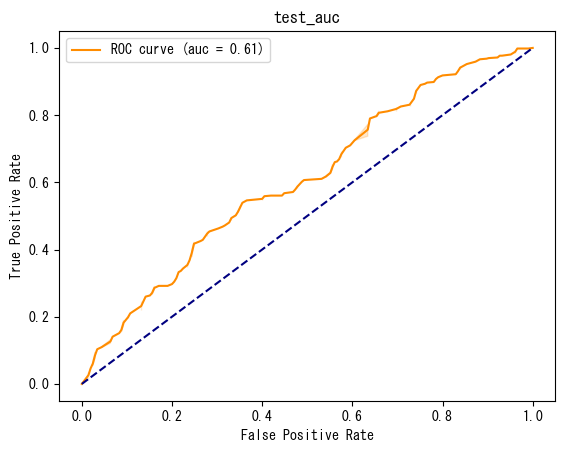

In [110]:
from sklearn.metrics import auc, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 指標の計算

# ROC曲線の各点の値(閾値ごとのFPRとTPR)の計算
false_positive_rates, true_positive_rates, thresholds = roc_curve(y_test, pred_proba_test) 

# aucの計算
test_auc = auc(false_positive_rates, true_positive_rates)

# 描画の作成

# 描画オブジェクトの作成
fig, ax = plt.subplots(1, 1)

# ROC曲線の描画
sns.lineplot(x = false_positive_rates, 
             y = true_positive_rates, 
             color = 'darkorange', label = f'ROC curve (auc = {test_auc:.2f})', ax = ax)

# 座標(0, 0) ~ (1, 1)の直線の描画
sns.lineplot(x = [0, 1], 
             y = [0, 1], 
             color='navy', linestyle='--', ax = ax);

# 軸ラベルとタイトルの設定
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('test_auc');

In [111]:
# 金額のパラメータを設定
TRUE_POSITIVE_BENEFIT = 35876 #不合格品を正しく判定できた場合に削減できるコスト
FALSE_POSITIVE_COST = 9112 #合格品を誤って判定した場合に発生するコスト

# 混同行列を一次元に変換して、各要素を変数に格納
# tpは「不合格と判定された不合格サンプル」(true positiveの略)
# fpは「合格と判定された不合格サンプル」(false positiveの略)
cm = confusion_matrix(y_test, pred_label_test)
tn, fp, fn, tp = cm.flatten() 

# コストメリットを計算して保存
total_benefit = tp * TRUE_POSITIVE_BENEFIT - fp * FALSE_POSITIVE_COST

# 結果の確認
print('しきい値: ', threshold)
print('テストデータのサンプル数: ', y_test.shape[0])
print('コストメリット: ', total_benefit)


しきい値:  0.5
テストデータのサンプル数:  767
コストメリット:  18276700


In [117]:
# 予測モデルの精度指標を計算する関数を定義
def calc_model_metrics(pred_proba_test, y_test, threshold):
    
    # ノック18 ----------------------------------------------------
    
    # 閾値以上なら1、そうでなければ0に変換
    pred_label_test = np.where(pred_proba_test >= threshold, 1, 0)

    # 結果の確認
    print('予測結果')
    print('------')
    print('予測が「不合格」のデータ数: ', pred_label_test[pred_label_test == 1].shape[0])
    print('予測が「合格」のデータ数: ', pred_label_test[pred_label_test == 0].shape[0])
    print('')
    
    # ノック19 ----------------------------------------------------
    # 指標の計算
    accuracy = accuracy_score(y_test, pred_label_test)
    precision = precision_score(y_test, pred_label_test)
    recall = recall_score(y_test, pred_label_test)
    f1 = f1_score(y_test, pred_label_test)

    # 指標の出力
    print('精度指標')
    print('------')
    print('Test Accuracy: ', accuracy.round(2))
    print('Test Precision: ', precision.round(2))
    print('Test Recall: ', recall.round(2))
    print('Test F1-score: ', f1.round(2))
    print('')
    
    # ノック20 ----------------------------------------------------
    
    # 混同行列を計算する
    cm_test = confusion_matrix(y_test, pred_label_test)

    # データフレームに変換する
    df_cm = pd.DataFrame(
        cm_test, 
        columns = np.unique(y_test), # カラム名を0, 1とする
        index = np.unique(y_test), # インデックス番号を0, 1とする
        )

    # インデックス名を設定
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Prediction'
    
    # 行・列どちらも0, 1の順になっているため、1, 0の順になるように並び替える
    df_cm = df_cm.sort_index(axis='index', ascending=False)
    df_cm = df_cm.sort_index(axis='columns', ascending=False)
    
    # 結果の確認
    print('混同行列')
    print('-----')
    print(df_cm)
    print('')
    
    # ノック21 ----------------------------------------------------
    
    # 指標の計算

    # ROC曲線の各点の値(閾値ごとのFPRとTPR)の計算
    false_positive_rates, true_positive_rates, thresholds = roc_curve(y_test, pred_proba_test) 

    # aucの計算
    test_auc = auc(false_positive_rates, true_positive_rates)

    # 描画の作成

    # 描画オブジェクトの作成
    fig, ax = plt.subplots(1, 1)

    # ROC曲線の描画
    sns.lineplot(x = false_positive_rates, 
                 y = true_positive_rates, 
                 color = 'darkorange', label = f'ROC curve (auc = {test_auc:.2f})', ax = ax)

    # 座標(0, 0) ~ (1, 1)の直線の描画
    sns.lineplot(x = [0, 1], 
                 y = [0, 1], 
                 color='navy', linestyle='--', ax = ax);

    # 軸ラベルとタイトルの設定
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('test_auc');
    
    # ノック22 ----------------------------------------------------

    # 金額のパラメータを設定
    TRUE_POSITIVE_BENEFIT = 35876 #不合格品を正しく判定できた場合に削減できるコスト
    FALSE_POSITIVE_COST = 9112 #合格品を誤って判定した場合に発生するコスト

    # 混同行列を一次元に変換して、各要素を変数に格納
    # tpは「不合格と判定された不合格サンプル」(true positiveの略)
    # fpは「合格と判定された不合格サンプル」(false positiveの略)
    cm = confusion_matrix(y_test, pred_label_test)
    tn, fp, fn, tp = cm.flatten() 

    # コストメリットを計算して保存
    total_benefit = tp * TRUE_POSITIVE_BENEFIT - fp * FALSE_POSITIVE_COST

    # 結果の確認
    print('ビジネスインパクトの概算')
    print('-----')
    print('しきい値:', threshold)
    print('データ数: ', y_test.shape[0])
    print('コストメリット:', total_benefit)
    print('')

In [118]:
# 各閾値に対する結果の保存先を作成
total_benefits = [] # 各閾値に対するコストメリット
tns = []            # 各閾値に対する合格（正解）数
fps = []            # 各閾値に対する合格（不正解）数
fns = []            # 各閾値に対する不合格（不正解）数
tps = []            # 各閾値に対する不合格（正解）数

# 0.0～1.0まで0.01刻みの閾値のリストを作成
thresholds = np.arange(0.0, 1.0, 0.01)

for threshold in thresholds:
    
    # その閾値に対する予測ラベルを作成
    pred_label_test = np.where(pred_proba_test >= threshold, 1, 0)
    
    # 混同行列の各要素を取得する
    cm = confusion_matrix(y_test, pred_label_test)
    tn, fp, fn, tp = cm.flatten()
    
    # 混同行列の各要素を保存
    tns.append(tn)
    fps.append(fp)
    fns.append(fn)
    tps.append(tp)
    
    # コストメリットを計算して保存
    total_benefit = tp*TRUE_POSITIVE_BENEFIT - fp*FALSE_POSITIVE_COST
    total_benefits.append(total_benefit)

# 結果をデータフレームにまとめる
df_cost_result = pd.DataFrame({
    'しきい値': thresholds,
    'コストメリット': total_benefits,
    '合格（正解）': tns,
    '合格（不正解）': fns,
    '不合格(不正解)': fps,
    '不合格(正解)': tps,
})
    
# 結果の確認
df_cost_result.head(20)

,しきい値,コストメリット,合格（正解）,合格（不正解）,不合格(不正解),不合格(正解)
0,0.00,18294352,0,0,205,562
1,0.01,18294352,0,0,205,562
2,0.02,18294352,0,0,205,562
3,0.03,18294352,0,0,205,562
4,0.04,18294352,0,0,205,562
5,0.05,18294352,0,0,205,562
6,0.06,18294352,0,0,205,562
7,0.07,18294352,0,0,205,562
8,0.08,18294352,0,0,205,562
9,0.09,18294352,0,0,205,562


In [119]:
# コストメリットが最も高くなるインデックス番号を取得
index_optimal = df_cost_result['コストメリット'].idxmax()

# 最もコストメリットが高くなる閾値と金額
df_cost_result.iloc[index_optimal]

しきい値               0.55
コストメリット     18322260.00
合格（正解）             7.00
合格（不正解）            1.00
不合格(不正解)         198.00
不合格(正解)          561.00
Name: 55, dtype: float64